In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [4]:
# 1. Importation des données
file_path = 'titanic_data.csv'  
data = pd.read_csv(file_path)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 3. Prétraitement des données
data = data.drop(['Name', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, errors='ignore')
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp
0,1,0,3,male,22.0,1
1,2,1,1,female,38.0,1
2,3,1,3,female,26.0,0
3,4,1,1,female,35.0,1
4,5,0,3,male,35.0,0


In [6]:
data = data.dropna(axis=0)
data.shape

(714, 6)

In [7]:
# Transformer 'Sex' en une variable numérique
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,0.365546,29.699118,0.512605
std,259.119524,0.491460,0.838250,0.481921,14.526497,0.929783
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000
25%,222.250000,0.000000,1.000000,0.000000,20.125000,0.000000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000
75%,677.750000,1.000000,3.000000,1.000000,38.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000


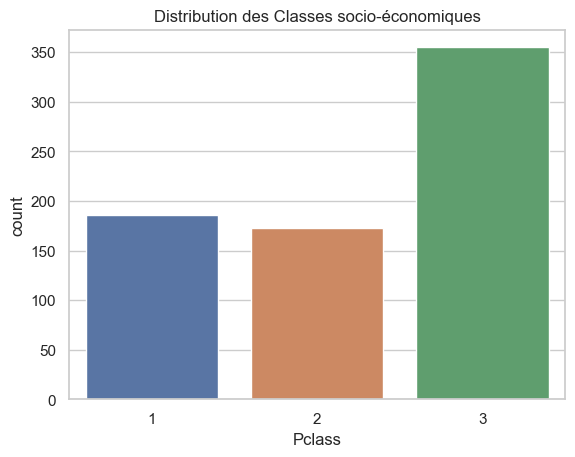

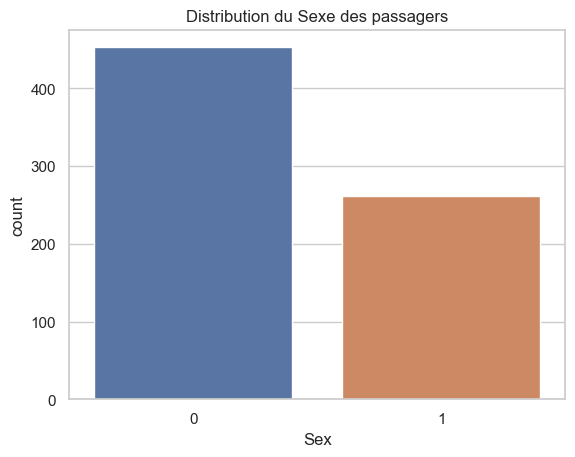

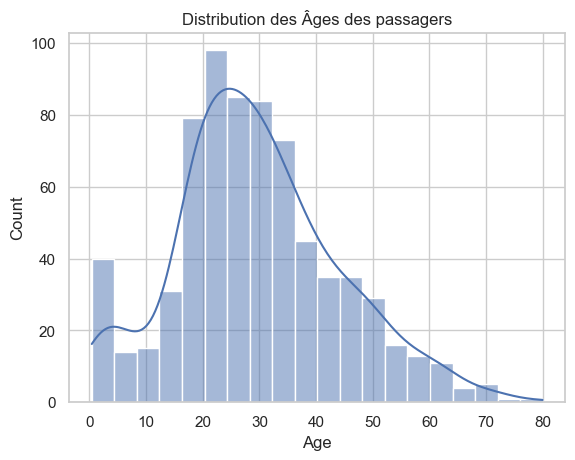

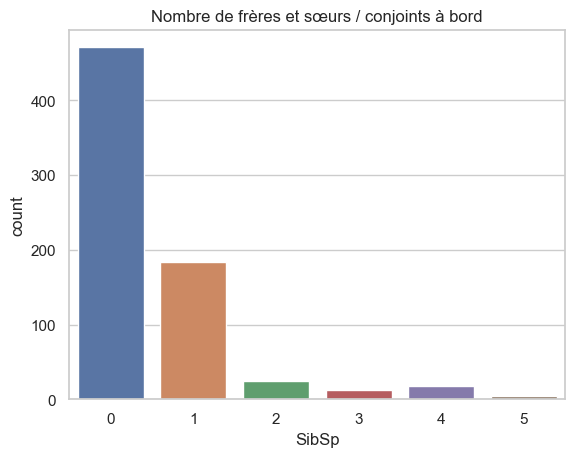

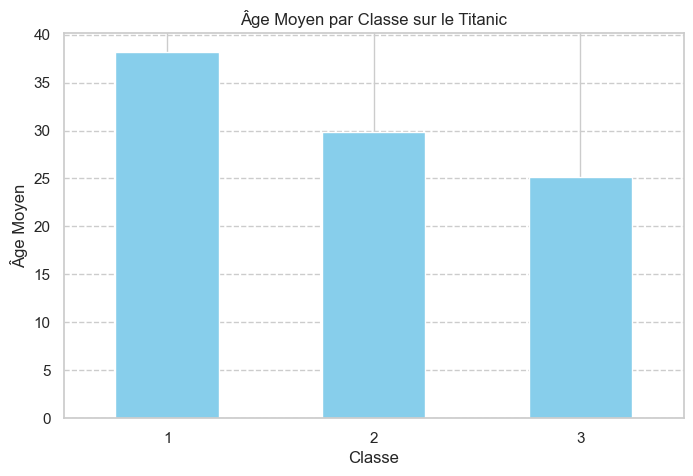

In [9]:
# 2. Exploration des données (EDA)
sns.set(style="whitegrid")

sns.countplot(x='Pclass', data=data)
plt.title('Distribution des Classes socio-économiques')
plt.show()

sns.countplot(x='Sex', data=data)
plt.title('Distribution du Sexe des passagers')
plt.show()

sns.histplot(data['Age'].dropna(), kde=True)
plt.title('Distribution des Âges des passagers')
plt.show()

sns.countplot(x='SibSp', data=data)
plt.title('Nombre de frères et sœurs / conjoints à bord')
plt.show()


# Calculer l'âge moyen par classe
age_mean_by_class = data.groupby('Pclass')['Age'].mean()

# Créer le graphique
plt.figure(figsize=(8, 5))
age_mean_by_class.plot(kind='bar', color='skyblue')
plt.title('Âge Moyen par Classe sur le Titanic')
plt.xlabel('Classe')
plt.ylabel('Âge Moyen')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Afficher le graphique
plt.show()

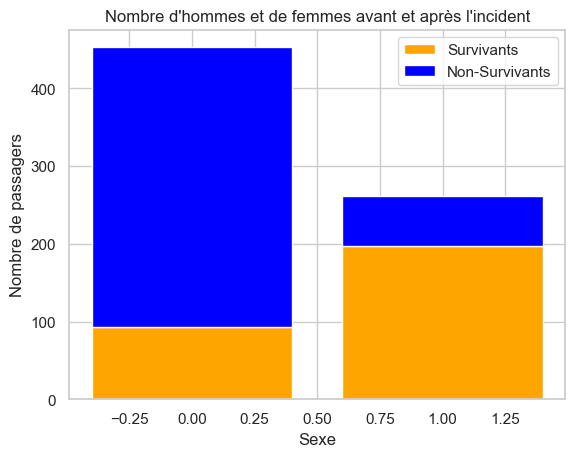

In [7]:
survived = data[data['Survived'] == 1]['Sex'].value_counts().sort_index()
not_survived = data[data['Survived'] == 0]['Sex'].value_counts().sort_index()

fig, ax = plt.subplots()

ax.bar(survived.index, survived.values, label='Survivants', color='orange')

ax.bar(not_survived.index, not_survived.values, bottom=survived.values, label='Non-Survivants', color='blue')

ax.set_ylabel('Nombre de passagers')
ax.set_xlabel('Sexe')
ax.set_title('Nombre d\'hommes et de femmes avant et après l\'incident')
ax.legend()

plt.show()


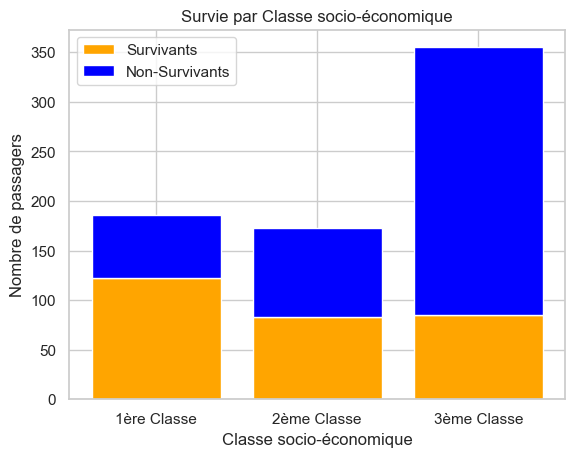

In [8]:
survived_class = data[data['Survived'] == 1]['Pclass'].value_counts().sort_index()
not_survived_class = data[data['Survived'] == 0]['Pclass'].value_counts().sort_index()

survived_class = survived_class.reindex(index = not_survived_class.index)

fig, ax = plt.subplots()

ax.bar(survived_class.index, survived_class.values, label='Survivants', color='orange')

ax.bar(not_survived_class.index, not_survived_class.values, bottom=survived_class.values, label='Non-Survivants', color='blue')

ax.set_ylabel('Nombre de passagers')
ax.set_xlabel('Classe socio-économique')
ax.set_title('Survie par Classe socio-économique')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['1ère Classe', '2ème Classe', '3ème Classe'])
ax.legend()

plt.show()


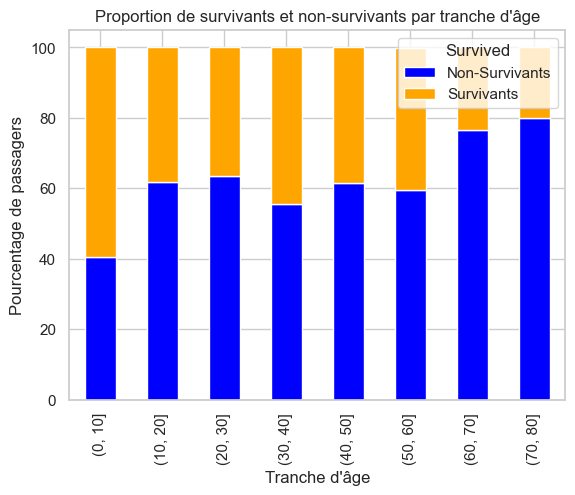

In [9]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
data['age_group'] = pd.cut(data['Age'], bins=bins)

age_groups = data.groupby('age_group')['Survived'].value_counts(normalize=True).unstack() * 100

age_groups.plot(kind='bar', stacked=True, color=['blue', 'orange'])

plt.title('Proportion de survivants et non-survivants par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Pourcentage de passagers')
plt.legend(title='Survived', labels=['Non-Survivants', 'Survivants'])

plt.show()


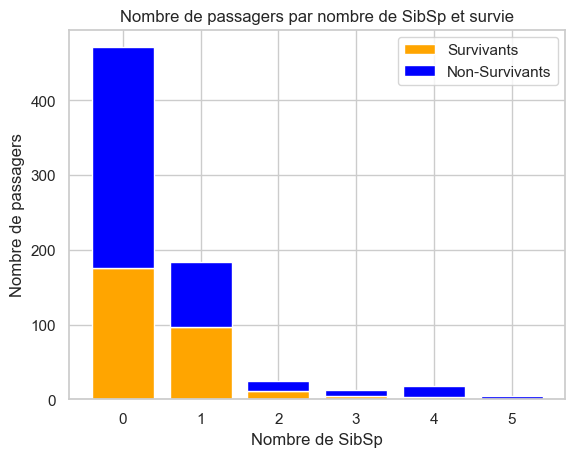

In [10]:
sibsp_counts = data['SibSp'].value_counts().sort_index()
survived_sibsp = data[data['Survived'] == 1]['SibSp'].value_counts().sort_index()
not_survived_sibsp = data[data['Survived'] == 0]['SibSp'].value_counts().sort_index()

all_sibsp = sibsp_counts.index.union(survived_sibsp.index).union(not_survived_sibsp.index)
survived_sibsp = survived_sibsp.reindex(all_sibsp, fill_value=0)
not_survived_sibsp = not_survived_sibsp.reindex(all_sibsp, fill_value=0)

fig, ax = plt.subplots()

ax.bar(survived_sibsp.index, survived_sibsp.values, label='Survivants', color='orange')
ax.bar(not_survived_sibsp.index, not_survived_sibsp.values, bottom=survived_sibsp.values, label='Non-Survivants', color='blue')

ax.set_xlabel('Nombre de SibSp')
ax.set_ylabel('Nombre de passagers')
ax.set_title('Nombre de passagers par nombre de SibSp et survie')
ax.legend()

plt.show()


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,0.365546,29.699118,0.512605
std,259.119524,0.491460,0.838250,0.481921,14.526497,0.929783
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000
25%,222.250000,0.000000,1.000000,0.000000,20.125000,0.000000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000
75%,677.750000,1.000000,3.000000,1.000000,38.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000


In [12]:
# 4. Division des données en ensembles d'entraînement et de test

X = data[['Pclass', 'Sex', 'Age', 'SibSp']]
y = data['Survived']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Taille de l'ensemble d'entraînement (X):", X_train.shape)
print("Taille de l'ensemble d'entraînement (y):", y_train.shape)
print("Taille de l'ensemble de test (X):", X_test.shape)
print("Taille de l'ensemble de test (y):", y_test.shape)
data.describe()

Taille de l'ensemble d'entraînement (X): (571, 4)
Taille de l'ensemble d'entraînement (y): (571,)
Taille de l'ensemble de test (X): (143, 4)
Taille de l'ensemble de test (y): (143,)


,PassengerId,Survived,Pclass,Sex,Age,SibSp
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,0.365546,29.699118,0.512605
std,259.119524,0.491460,0.838250,0.481921,14.526497,0.929783
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000
25%,222.250000,0.000000,1.000000,0.000000,20.125000,0.000000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000
75%,677.750000,1.000000,3.000000,1.000000,38.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000


In [13]:
X_train.dtypes

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
dtype: object

In [14]:
# 5. Entraînement de différents modèles


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy Régression Logistique:", accuracy_logreg)


Accuracy Régression Logistique: 0.7972027972027972


In [15]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy Arbre de Décision:", accuracy_tree)


Accuracy Arbre de Décision: 0.7482517482517482


In [16]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Accuracy Forêt Aléatoire:", accuracy_forest)


Accuracy Forêt Aléatoire: 0.7832167832167832


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy (Arbre de Décision):", accuracy_tree)

# Matrice de confusion
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de Confusion (Arbre de Décision):\n", conf_matrix_tree)

# Précision, Rappel, F1-Score
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
print("Précision (Arbre de Décision):", precision_tree)
print("Rappel (Arbre de Décision):", recall_tree)
print("F1-Score (Arbre de Décision):", f1_tree)


Accuracy (Arbre de Décision): 0.7482517482517482
Matrice de Confusion (Arbre de Décision):
 [[64 15]
 [21 43]]
Précision (Arbre de Décision): 0.7413793103448276
Rappel (Arbre de Décision): 0.671875
F1-Score (Arbre de Décision): 0.7049180327868853


In [20]:
# Accuracy
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Accuracy (Forêt Aléatoire):", accuracy_forest)

# Matrice de confusion
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
print("Matrice de Confusion (Forêt Aléatoire):\n", conf_matrix_forest)

# Précision, Rappel, F1-Score
precision_forest = precision_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)
print("Précision (Forêt Aléatoire):", precision_forest)
print("Rappel (Forêt Aléatoire):", recall_forest)
print("F1-Score (Forêt Aléatoire):", f1_forest)


Accuracy (Forêt Aléatoire): 0.7832167832167832
Matrice de Confusion (Forêt Aléatoire):
 [[67 12]
 [19 45]]
Précision (Forêt Aléatoire): 0.7894736842105263
Rappel (Forêt Aléatoire): 0.703125
F1-Score (Forêt Aléatoire): 0.743801652892562


In [21]:
# Calcul de l'Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy (Régression Logistique):", accuracy_logreg)

# Matrice de confusion
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Matrice de Confusion (Régression Logistique):\n", conf_matrix_logreg)

# Précision
precision_logreg = precision_score(y_test, y_pred_logreg)
print("Précision (Régression Logistique):", precision_logreg)

# Rappel
recall_logreg = recall_score(y_test, y_pred_logreg)
print("Rappel (Régression Logistique):", recall_logreg)

# F1-Score
f1_logreg = f1_score(y_test, y_pred_logreg)
print("F1-Score (Régression Logistique):", f1_logreg)


Accuracy (Régression Logistique): 0.7972027972027972
Matrice de Confusion (Régression Logistique):
 [[71  8]
 [21 43]]
Précision (Régression Logistique): 0.8431372549019608
Rappel (Régression Logistique): 0.671875
F1-Score (Régression Logistique): 0.7478260869565218


In [22]:
import joblib

# Sauvegarde du modèle
joblib.dump(logreg, 'logreg_model.pkl')

['logreg_model.pkl']